In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import regrid_utils as regrid
from CASutils import mapplot_utils as mymaps
from CASutils import colorbar_utils as cbars
from CASutils import averaging_utils as avg
from CASutils import linfit_utils as linfit

import cartopy.crs as ccrs
import warnings
import sys
warnings.filterwarnings("ignore")

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/"

In [3]:
### Define atmosphere grid for regridding
landfrac = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/ocn_wgts/LANDFRAC_LENS2.nc")
atmgrid=xr.Dataset({'lat':landfrac.lat, 'lon':landfrac.lon})

### Labrador sea mixed layer depth

In [4]:
# Read in the weights and set the values for the region outside the lab sea to zero
wgts = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/ocn_wgts/"+
                       "b.e21.BSSP370smbb.f09_g17.LE2-1301.018.pop.h.HMXL.208501-209412.nc")
#wgts=xr.open_dataset("/project/mojave/cesm2/LENS/ocn/month_1/HMXL/b.e21.BSSP370smbb.f09_g17.LE2-1301.018.pop.h.HMXL.208501-209412.nc").TAREA
wgts = xr.where( (wgts.TLONG > 300) & (wgts.TLONG < 315), wgts, 0)
wgts = xr.where( (wgts.TLAT > 53) & (wgts.TLAT < 65), wgts, 0)

In [5]:
lens1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/LENS1_March_HMXL.nc")
lens1 = lens1.mean('M').HMXL
aaer1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_March_HMXL.nc")
aaer1 = aaer1.mean('M').HMXL
xaaer1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/XAER_March_HMXL.nc")
xaaer1 = xaaer1.mean('M').HMXL

In [6]:
lens2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/LENS2_March_HMXL.nc")
lens2 = lens2.mean('M').HMXL
aaer2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_March_HMXL.nc")
aaer2 = aaer2.mean('M').HMXL
xaaer2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/xAER_March_HMXL.nc")
xaaer2 = xaaer2.mean('M').HMXL

In [7]:
lens1['time'] = lens1.time.dt.year
aaer1['time'] = aaer1.time.dt.year
xaaer1['time'] = xaaer1.time.dt.year

lens2['time'] = lens2.time.dt.year
aaer2['time'] = aaer2.time.dt.year
xaaer2['time'] = xaaer2.time.dt.year

In [8]:
lens1_base = lens1.sel(time=slice(1920,1940)).mean('time')
aaer1_base = aaer1.sel(time=slice(1920,1940)).mean('time')
xaaer1_base = xaaer1.sel(time=slice(1920,1940)).mean('time')

lens2_base = lens2.sel(time=slice(1920,1940)).mean('time')
aaer2_base = aaer2.sel(time=slice(1920,1940)).mean('time')
xaaer2_base = xaaer2.sel(time=slice(1920,1940)).mean('time')

In [9]:
lens1_anoms = lens1 - lens1_base
aaer1_anoms = aaer1 - aaer1_base
xaaer1_anoms = xaaer1 - xaaer1_base

lens2_anoms = lens2 - lens2_base
aaer2_anoms = aaer2 - aaer2_base
xaaer2_anoms = xaaer2 - xaaer2_base

In [10]:
lens1_period = lens1_anoms.sel(time=slice(2030,2050)).mean('time')
aaer1_period = aaer1_anoms.sel(time=slice(2030,2050)).mean('time')
xaaer1_period = xaaer1_anoms.sel(time=slice(2030,2050)).mean('time')

lens2_period = lens2_anoms.sel(time=slice(2030,2050)).mean('time')
aaer2_period = aaer2_anoms.sel(time=slice(2030,2050)).mean('time')
xaaer2_period = xaaer2_anoms.sel(time=slice(2030,2050)).mean('time')

In [11]:
# regrid period panels 
lens1_period_hmxl = regrid.regridpop(lens1_period, 'POP_gx1v7', atmgrid)
aaer1_period_hmxl = regrid.regridpop(aaer1_period, 'POP_gx1v7', atmgrid)
xaaer1_period_hmxl = regrid.regridpop(xaaer1_period, 'POP_gx1v7', atmgrid)

lens2_period_hmxl = regrid.regridpop(lens2_period, 'POP_gx1v7', atmgrid)
aaer2_period_hmxl = regrid.regridpop(aaer2_period, 'POP_gx1v7', atmgrid)
xaaer2_period_hmxl = regrid.regridpop(xaaer2_period, 'POP_gx1v7', atmgrid)

In [12]:
lens1_anoms_w = lens1_anoms.weighted(wgts.fillna(0))
lens1_anoms_m = lens1_anoms_w.mean(("nlon","nlat"))

aaer1_anoms_w = aaer1_anoms.weighted(wgts.fillna(0))
aaer1_anoms_m = aaer1_anoms_w.mean(("nlon","nlat"))

xaaer1_anoms_w = xaaer1_anoms.weighted(wgts.fillna(0))
xaaer1_anoms_m = xaaer1_anoms_w.mean(("nlon","nlat"))

lens2_anoms_w = lens2_anoms.weighted(wgts.fillna(0))
lens2_anoms_m = lens2_anoms_w.mean(("nlon","nlat"))

aaer2_anoms_w = aaer2_anoms.weighted(wgts.fillna(0))
aaer2_anoms_m = aaer2_anoms_w.mean(("nlon","nlat"))

xaaer2_anoms_w = xaaer2_anoms.weighted(wgts.fillna(0))
xaaer2_anoms_m = xaaer2_anoms_w.mean(("nlon","nlat"))

In [13]:
lens1_hmxl = lens1_anoms_m.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
aaer1_hmxl = aaer1_anoms_m.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
xaaer1_hmxl = xaaer1_anoms_m.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')

lens2_hmxl = lens2_anoms_m.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
aaer2_hmxl = aaer2_anoms_m.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
xaaer2_hmxl = xaaer2_anoms_m.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')

### Sea ice thickness

In [14]:
#dat = xr.open_dataset("/project/mojave/cesm2/LENS/ice/month_1/hi/b.e21.BSSP370smbb.f09_g17.LE2-1301.018.cice.h.hi.205501-206412.nc")
dat = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/ocn_wgts/"+
                      "b.e21.BSSP370smbb.f09_g17.LE2-1301.018.cice.h.hi.205501-206412.nc")
wgts = dat.tarea
wgts = xr.where( (dat.TLON > 220) & (dat.TLON < 360), wgts, 0)
wgts = xr.where( (dat.TLAT > 70) & (dat.TLAT < 90), wgts, 0)

In [15]:
lens1t = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/LENS1_sicthick_am.nc")
lens1t = lens1t.mean('M').hi
lens1 = xr.DataArray(np.zeros([lens1t.year.size, wgts.nj.size, lens1t.ni.size]),
                     coords=[lens1t.year, wgts.nj, lens1t.ni],
                     dims=['year','nj','ni'], name='hi')
lens1[:,384-lens1t.nj.size:384,:] = np.array(lens1t)

aaer1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER1_sicthick_am.nc")
aaer1 = aaer1.mean('M').hi
xaaer1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/XAER_sicthick_am.nc")
xaaer1 = xaaer1.mean('M').hi

In [16]:
lens2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/LENS2_sicthick_am.nc")
lens2 = lens2.mean('M').hi
aaer2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_sicthick_am.nc")
aaer2 = aaer2.mean('M').hi
xaaer2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/xAER_sicthick_am.nc")
xaaer2 = xaaer2.mean('M').hi

In [17]:
lens1_base = lens1.sel(year=slice(1920,1940)).mean('year')
aaer1_base = aaer1.sel(year=slice(1920,1940)).mean('year')
xaaer1_base = xaaer1.sel(year=slice(1920,1940)).mean('year')

lens2_base = lens2.sel(year=slice(1920,1940)).mean('year')
aaer2_base = aaer2.sel(year=slice(1920,1940)).mean('year')
xaaer2_base = xaaer2.sel(year=slice(1920,1940)).mean('year')

In [18]:
lens1_anoms = lens1 - lens1_base
aaer1_anoms = aaer1 - aaer1_base
xaaer1_anoms = xaaer1 - xaaer1_base

lens2_anoms = lens2 - lens2_base
aaer2_anoms = aaer2 - aaer2_base
xaaer2_anoms = xaaer2 - xaaer2_base

In [19]:
lens1_period = lens1_anoms.sel(year=slice(2030,2050)).mean('year')
aaer1_period = aaer1_anoms.sel(year=slice(2030,2050)).mean('year')
xaaer1_period = xaaer1_anoms.sel(year=slice(2030,2050)).mean('year')

lens2_period = lens2_anoms.sel(year=slice(2030,2050)).mean('year')
aaer2_period = aaer2_anoms.sel(year=slice(2030,2050)).mean('year')
xaaer2_period = xaaer2_anoms.sel(year=slice(2030,2050)).mean('year')

In [20]:
# regrid period panels 
lens1_period_hi = regrid.regridpop(lens1_period, 'POP_gx1v7', atmgrid)
aaer1_period_hi = regrid.regridpop(aaer1_period, 'POP_gx1v7', atmgrid)
xaaer1_period_hi = regrid.regridpop(xaaer1_period, 'POP_gx1v7', atmgrid)

lens2_period_hi = regrid.regridpop(lens2_period, 'POP_gx1v7', atmgrid)
aaer2_period_hi = regrid.regridpop(aaer2_period, 'POP_gx1v7', atmgrid)
xaaer2_period_hi = regrid.regridpop(xaaer2_period, 'POP_gx1v7', atmgrid)

In [21]:
lens1_anoms_w = lens1_anoms.weighted(wgts.fillna(0))
lens1_anoms_m = lens1_anoms_w.mean(("ni","nj"))

aaer1_anoms_w = aaer1_anoms.weighted(wgts.fillna(0))
aaer1_anoms_m = aaer1_anoms_w.mean(("ni","nj"))

xaaer1_anoms_w = xaaer1_anoms.weighted(wgts.fillna(0))
xaaer1_anoms_m = xaaer1_anoms_w.mean(("ni","nj"))

lens2_anoms_w = lens2_anoms.weighted(wgts.fillna(0))
lens2_anoms_m = lens2_anoms_w.mean(("ni","nj"))

aaer2_anoms_w = aaer2_anoms.weighted(wgts.fillna(0))
aaer2_anoms_m = aaer2_anoms_w.mean(("ni","nj"))

xaaer2_anoms_w = xaaer2_anoms.weighted(wgts.fillna(0))
xaaer2_anoms_m = xaaer2_anoms_w.mean(("ni","nj"))

In [22]:
lens1_hi = lens1_anoms_m.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')
aaer1_hi = aaer1_anoms_m.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')
xaaer1_hi = xaaer1_anoms_m.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')

lens2_hi = lens2_anoms_m.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')
aaer2_hi = aaer2_anoms_m.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')
xaaer2_hi = xaaer2_anoms_m.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')

### Density 

In [23]:
lens2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/LENS2_March_RHO203.nc")
lens2 = lens2.mean('M').RHO_top203
aaer2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_March_RHO203.nc")
aaer2 = aaer2.mean('M').RHO_top203
xaaer2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/xAER_March_RHO203.nc")
xaaer2 = xaaer2.mean('M').RHO_top203

In [24]:
lens2['time'] = lens2.time.dt.year
aaer2['time'] = aaer2.time.dt.year
xaaer2['time'] = xaaer2.time.dt.year

In [25]:
lens2_base = lens2.sel(time=slice(1920,1940)).mean('time')
aaer2_base = aaer2.sel(time=slice(1920,1940)).mean('time')
xaaer2_base = xaaer2.sel(time=slice(1920,1940)).mean('time')

In [26]:
lens2_anoms = lens2 - lens2_base
aaer2_anoms = aaer2 - aaer2_base
xaaer2_anoms = xaaer2 - xaaer2_base

In [27]:
lens2_period = lens2_anoms.sel(time=slice(2030,2050)).mean('time')
aaer2_period = aaer2_anoms.sel(time=slice(2030,2050)).mean('time')
xaaer2_period = xaaer2_anoms.sel(time=slice(2030,2050)).mean('time')

In [28]:
lens2_period_rho = regrid.regridpop(lens2_period, 'POP_gx1v7', atmgrid)
aaer2_period_rho = regrid.regridpop(aaer2_period, 'POP_gx1v7', atmgrid)
xaaer2_period_rho = regrid.regridpop(xaaer2_period, 'POP_gx1v7', atmgrid)

In [29]:
# convert from g/cm3 to kg/m3
lens2_period_rho = lens2_period_rho*(1./1000.)*100.*100.*100.
aaer2_period_rho = aaer2_period_rho*(1./1000.)*100.*100.*100.
xaaer2_period_rho = xaaer2_period_rho*(1./1000.)*100.*100.*100.

In [30]:
lens2_rho_parts = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/RHO_components_LENS2.nc")
lens2_rho_parts = lens2_rho_parts.mean('M')
lens2_rho_parts = lens2_rho_parts.where(lens2_rho_parts.time.dt.month == 3, drop=True)
lens2_rho_parts['time'] = lens2_rho_parts.time.dt.year
aaer2_rho_parts = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/RHO_components_AAER2.nc")
aaer2_rho_parts = aaer2_rho_parts.mean('M')
aaer2_rho_parts = aaer2_rho_parts.where(aaer2_rho_parts.time.dt.month == 3, drop=True)
aaer2_rho_parts['time'] = aaer2_rho_parts.time.dt.year
xaaer2_rho_parts = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/RHO_components_xAER2.nc")
xaaer2_rho_parts = xaaer2_rho_parts.mean('M')
xaaer2_rho_parts = xaaer2_rho_parts.where(xaaer2_rho_parts.time.dt.month == 3, drop=True)
xaaer2_rho_parts['time'] = xaaer2_rho_parts.time.dt.year

In [31]:
lens1_rho_parts = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/RHO_components_LENS1.nc")
lens1_rho_parts = lens1_rho_parts.mean('M')
lens1_rho_parts = lens1_rho_parts.where(lens1_rho_parts.time.dt.month == 3, drop=True)
lens1_rho_parts['time'] = lens1_rho_parts.time.dt.year
aaer1_rho_parts = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/RHO_components_AAER1.nc")
aaer1_rho_parts = aaer1_rho_parts.mean('M')
aaer1_rho_parts = aaer1_rho_parts.where(aaer1_rho_parts.time.dt.month == 3, drop=True)
aaer1_rho_parts['time'] = aaer1_rho_parts.time.dt.year
xaaer1_rho_parts = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/RHO_components_XAAER1.nc")
xaaer1_rho_parts = xaaer1_rho_parts.mean('M')
xaaer1_rho_parts = xaaer1_rho_parts.where(xaaer1_rho_parts.time.dt.month == 3, drop=True)
xaaer1_rho_parts['time'] = xaaer1_rho_parts.time.dt.year

In [32]:
lens2_rho_parts_base = lens2_rho_parts.sel(time=slice(1920,1940)).mean('time')
aaer2_rho_parts_base = aaer2_rho_parts.sel(time=slice(1920,1940)).mean('time')
xaaer2_rho_parts_base = xaaer2_rho_parts.sel(time=slice(1920,1940)).mean('time')

lens1_rho_parts_base = lens1_rho_parts.sel(time=slice(1920,1940)).mean('time')
aaer1_rho_parts_base = aaer1_rho_parts.sel(time=slice(1920,1940)).mean('time')
xaaer1_rho_parts_base = xaaer1_rho_parts.sel(time=slice(1920,1940)).mean('time')

In [33]:
lens2_rho_parts = lens2_rho_parts - lens2_rho_parts_base
aaer2_rho_parts = aaer2_rho_parts - aaer2_rho_parts_base
xaaer2_rho_parts = xaaer2_rho_parts - xaaer2_rho_parts_base

lens1_rho_parts = lens1_rho_parts - lens1_rho_parts_base
aaer1_rho_parts = aaer1_rho_parts - aaer1_rho_parts_base
xaaer1_rho_parts = xaaer1_rho_parts - xaaer1_rho_parts_base

In [34]:
lens2_rho_parts = lens2_rho_parts.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
aaer2_rho_parts = aaer2_rho_parts.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
xaaer2_rho_parts = xaaer2_rho_parts.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')

lens1_rho_parts = lens1_rho_parts.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
aaer1_rho_parts = aaer1_rho_parts.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')
xaaer1_rho_parts = xaaer1_rho_parts.rolling(time=21, min_periods=21, center='True').mean('time').dropna('time')

### piControl density feedback

In [35]:
pi_amoc1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/piControl/CESM1/piControl_AMOC_am.nc")
pi_rho1 = xr.open_dataset(
    "/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/piControl/CESM1/cesm1_picontrol_rho_top203_60to35W_50to65N.nc")
pi_rhoparts1 = xr.open_dataset(
    "/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/piControl/CESM1/RHO_contributions_CESM1_picontrol.nc")

pi_temp1 = pi_rhoparts1.TEMP_part[pi_rhoparts1.time.dt.month == 3]
pi_salt1 = pi_rhoparts1.SALT_part[pi_rhoparts1.time.dt.month == 3]
pi_rhofromeos1 = pi_rhoparts1.RHO_from_EOS[pi_rhoparts1.time.dt.month == 3]

pi_amoc1anoms = pi_amoc1 - pi_amoc1.mean('year')
pi_rho1anoms = pi_rho1 - pi_rho1.mean('time')
pi_rhofromeos1anoms = pi_rhofromeos1 - pi_rhofromeos1.mean('time')
pi_temp1anoms = pi_temp1 - pi_temp1.mean('time')
pi_salt1anoms = pi_salt1 - pi_salt1.mean('time')

In [36]:
pi_amoc2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/piControl/CESM2/piControl_AMOC_am.nc")
pi_rho2 = xr.open_dataset(
    "/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/piControl/CESM2/cesm2_picontrol_rho_top203_60to35W_50to65N.nc")

pi_rhoparts2 = xr.open_dataset(
    "/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/piControl/CESM2/RHO_contributions_CESM2_picontrol.nc")
pi_temp2 = pi_rhoparts2.TEMP_part[pi_rhoparts2.time.dt.month == 3]
pi_salt2 = pi_rhoparts2.SALT_part[pi_rhoparts2.time.dt.month == 3]
pi_rhofromeos2 = pi_rhoparts2.RHO_from_EOS[pi_rhoparts2.time.dt.month == 3]

pi_amoc2anoms = pi_amoc2 - pi_amoc2.mean('year')
pi_rho2anoms = pi_rho2 - pi_rho2.mean('time')
pi_rhofromeos2anoms = pi_rhofromeos2 - pi_rhofromeos2.mean('time')
pi_temp2anoms = pi_temp2 - pi_temp2.mean('time')
pi_salt2anoms = pi_salt2 - pi_salt2.mean('time')

In [37]:
# 10 year running means
pi_amoc1_sm = pi_amoc1anoms.rolling(year=10, min_periods=10, center='True').mean('year').dropna('year').MOC
pi_rhofromeos1_sm = pi_rhofromeos1anoms.rolling(time=10, min_periods=10, center='True').mean('time').dropna('time')
pi_salt1_sm = pi_salt1anoms.rolling(time=10, min_periods=10, center='True').mean('time').dropna('time')
pi_temp1_sm = pi_temp1anoms.rolling(time=10, min_periods=10, center='True').mean('time').dropna('time')

pi_amoc2_sm = pi_amoc2anoms.rolling(year=10, min_periods=10, center='True').mean('year').dropna('year').MOC
pi_rhofromeos2_sm = pi_rhofromeos2anoms.rolling(time=10, min_periods=10, center='True').mean('time').dropna('time')
pi_salt2_sm = pi_salt2anoms.rolling(time=10, min_periods=10, center='True').mean('time').dropna('time')
pi_temp2_sm = pi_temp2anoms.rolling(time=10, min_periods=10, center='True').mean('time').dropna('time')

In [38]:
# lagged regressions
lag = np.arange(-40,40)

reg2_rho = np.zeros(len(lag))
reg2_salt = np.zeros(len(lag))
reg2_temp = np.zeros(len(lag))
reg2_amoc = np.zeros(len(lag))

reg1_rho = np.zeros(len(lag))
reg1_salt = np.zeros(len(lag))
reg1_temp = np.zeros(len(lag))
reg1_amoc = np.zeros(len(lag))

for ilag in np.arange(0,len(lag),1):

    #-------CESM2
    amocshift = pi_amoc2_sm.shift(year=lag[ilag]).dropna(dim='year')
    minyear = amocshift.year[0] ; maxyear = amocshift.year[len(amocshift)-1]

    rhouse = pi_rhofromeos2_sm[ (pi_rhofromeos2_sm.time.dt.year >= minyear) & (pi_rhofromeos2_sm.time.dt.year <= maxyear) ]
    a, b = linfit.linfit_xy(amocshift, rhouse)
    reg2_rho[ilag] = b
    
    saltuse = pi_salt2_sm[ (pi_salt2_sm.time.dt.year >= minyear) & (pi_salt2_sm.time.dt.year <= maxyear) ]
    a, b = linfit.linfit_xy(amocshift, saltuse)
    reg2_salt[ilag] = b
    
    tempuse = pi_temp2_sm[ (pi_temp2_sm.time.dt.year >= minyear) & (pi_temp2_sm.time.dt.year <= maxyear) ]
    a, b = linfit.linfit_xy(amocshift, tempuse)
    reg2_temp[ilag] = b
    
    amocuse = pi_amoc2_sm[ (pi_amoc2_sm.year >= minyear) & (pi_amoc2_sm.year <= maxyear) ]
    a, b = linfit.linfit_xy(amocshift, amocuse)
    reg2_amoc[ilag] = b
    
    
    #---------CESM1
    amocshift = pi_amoc1_sm.shift(year=lag[ilag]).dropna('year')
    minyear = amocshift.year[0] ; maxyear = amocshift.year[len(amocshift)-1]
    
    rhouse = pi_rhofromeos1_sm[ (pi_rhofromeos1_sm.time.dt.year >= minyear) & (pi_rhofromeos1_sm.time.dt.year <= maxyear) ]
    a, b = linfit.linfit_xy(amocshift, rhouse)
    reg1_rho[ilag] = b
    
    saltuse = pi_salt1_sm[ (pi_salt1_sm.time.dt.year >= minyear) & (pi_salt1_sm.time.dt.year <= maxyear) ]
    a, b = linfit.linfit_xy(amocshift, saltuse)
    reg1_salt[ilag] = b
    
    tempuse = pi_temp1_sm[ (pi_temp1_sm.time.dt.year >= minyear) & (pi_temp1_sm.time.dt.year <= maxyear) ]
    a, b = linfit.linfit_xy(amocshift, tempuse)
    reg1_temp[ilag] = b
    
    amocuse = pi_amoc1_sm[ (pi_amoc1_sm.year >= minyear) & (pi_amoc1_sm.year <= maxyear) ] 
    a, b = linfit.linfit_xy(amocshift, amocuse)
    reg1_amoc[ilag] = b



### Plot the plot

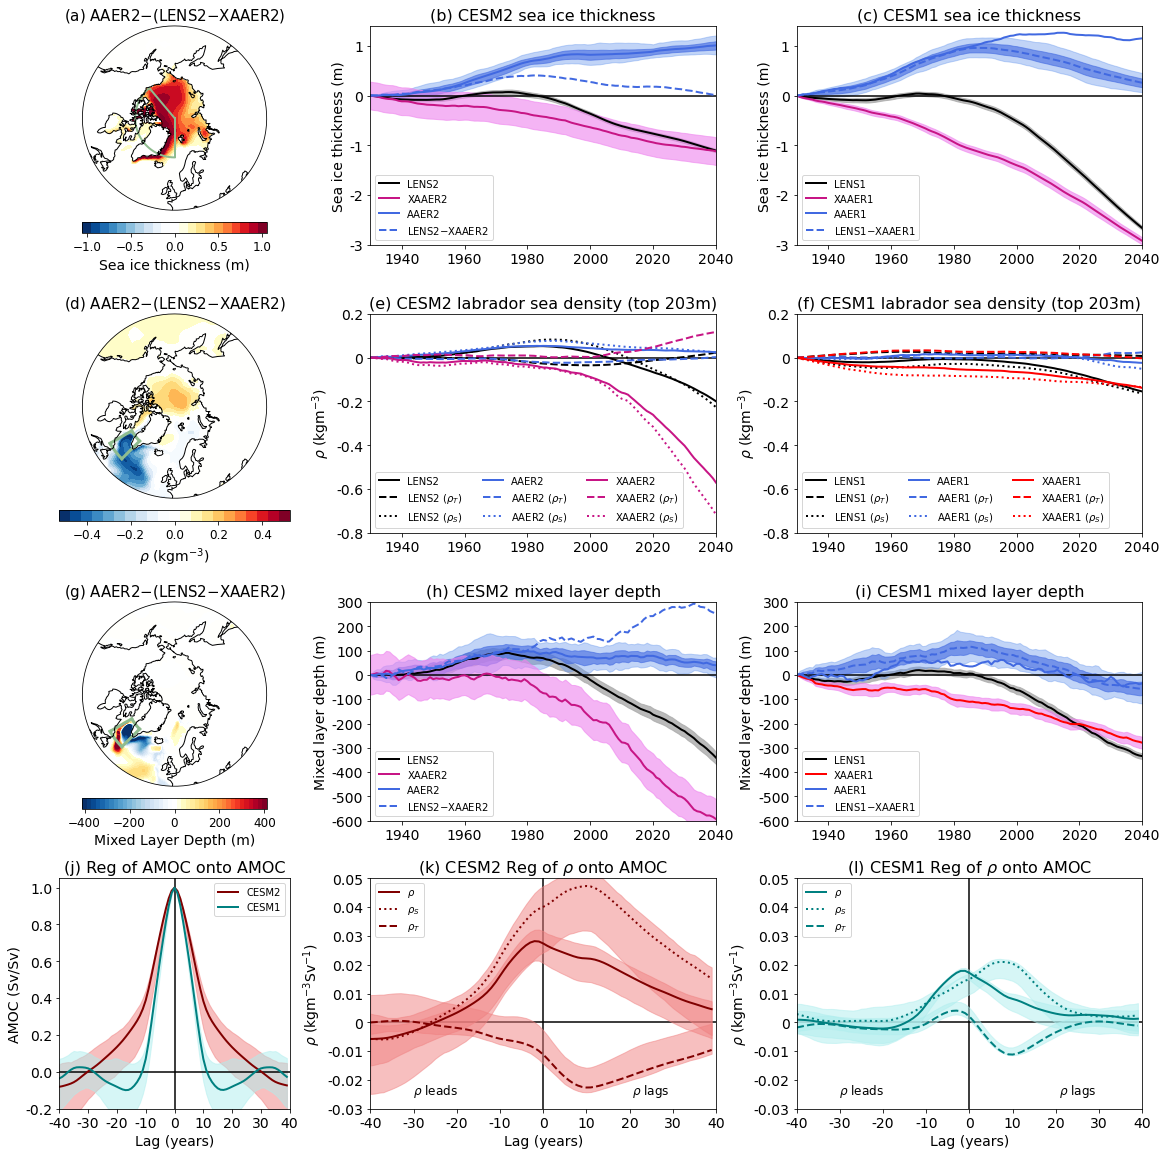

In [40]:
fig = plt.figure(figsize=(16,16))

#-----------------------------------------Sea ice thickness
ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, aaer2_period_hi - (lens2_period_hi - xaaer2_period_hi),
                                                      landfrac.lon, landfrac.lat, 0.1, -1, 1,'(a) AAER2$-$(LENS2$-$XAAER2)',
                                                      0.07,0.23,0.83,0.99,latlim=45)
ax.plot(np.arange(220,360+1,1), np.arange(220,360+1,1)*0 + 70, color='darkseagreen', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(np.arange(70,90+1,1)*0 + 220, np.arange(70,90+1,1), color='darkseagreen', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(np.arange(70,90+1,1)*0 + 360, np.arange(70,90+1,1), color='darkseagreen', linewidth=2, transform=ccrs.PlateCarree())

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'Sea ice thickness (m)',0.07,0.23,0.81,0.82, fsize=12)

ax = fig.add_axes([0.32,0.8,0.3,0.19])
ax.set_xlim(1930,2040)
ax.set_xticks([1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylim(-3,1.4)
ax.set_yticks([-3,-2,-1,0,1])
ax.set_yticklabels(['-3','-2','-1','0','1'], fontsize=14)
ax.set_title('(b) CESM2 sea ice thickness', fontsize=16)
ax.set_ylabel('Sea ice thickness (m)', fontsize=14)
ax.plot([1930,2040],[0,0], color='black')

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM2_SICTHICK.nc", cache=False)
#ax.fill_between(boot.year, boot.min95_lens2_3, boot.max95_lens2_3, color='lightgray', alpha=0.8)
ax.fill_between(boot.year, boot.min95_lens2, boot.max95_lens2, color='darkgray', alpha=0.8)
ax.fill_between(boot.year, boot.min95_aaer2_3, boot.max95_aaer2_3, color='cornflowerblue', alpha=0.4)
ax.fill_between(boot.year, boot.min95_aaer2, boot.max95_aaer2, color='royalblue', alpha=0.6)
ax.fill_between(boot.year, boot.min95_xaer2, boot.max95_xaer2, color='violet', alpha=0.6)

ax.plot(lens2_hi.year, lens2_hi, color='black', linewidth=2, label='LENS2')
ax.plot(xaaer2_hi.year, xaaer2_hi, color='mediumvioletred', linewidth=2, label='XAAER2')
ax.plot(aaer2_hi.year, aaer2_hi, color='royalblue', linewidth=2, label='AAER2')
ax.plot(xaaer2_hi.year, lens2_hi - xaaer2_hi, color='royalblue', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')

ax.legend(loc='lower left')

ax = fig.add_axes([0.69,0.8,0.3,0.19])
ax.set_xlim(1930,2040)
ax.set_xticks([1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylim(-3,1.4)
ax.set_yticks([-3,-2,-1,0,1])
ax.set_yticklabels(['-3','-2','-1','0','1'], fontsize=14)
ax.set_title('(c) CESM1 sea ice thickness', fontsize=16)
ax.set_ylabel('Sea ice thickness (m)', fontsize=14)
ax.plot([1930,2040],[0,0], color='black')

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM1_SICTHICK.nc", cache=False)
ax.fill_between(boot.year, boot.min95_lens1, boot.max95_lens1, color='darkgray', alpha=0.8)
ax.fill_between(boot.year, boot.min95_aer1xway3, boot.max95_aer1xway3, color='cornflowerblue', alpha=0.4)
ax.fill_between(boot.year, boot.min95_aer1xway, boot.max95_aer1xway, color='royalblue', alpha=0.6)
ax.fill_between(boot.year, boot.min95_xaer1, boot.max95_xaer1, color='violet', alpha=0.6)


ax.plot(lens1_hi.year, lens1_hi, color='black', linewidth=2, label='LENS1')
ax.plot(xaaer1_hi.year, xaaer1_hi, color='mediumvioletred', linewidth=2, label='XAAER1')
ax.plot(aaer1_hi.year, aaer1_hi, color='royalblue', linewidth=2, label='AAER1')
ax.plot(xaaer1_hi.year, lens1_hi - xaaer1_hi, color='royalblue', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.legend(loc='lower left')
#---------------------------------------------------------------------------



#---------------------------------------------------------------------Salinity
ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, aaer2_period_rho - (lens2_period_rho - xaaer2_period_rho),
                                                      landfrac.lon, landfrac.lat, 0.05, -0.5, 0.5,'(d) AAER2$-$(LENS2$-$XAAER2)',
                                                      0.07,0.23,0.58,0.74,latlim=45)
ax.plot(np.arange(53,66,1)*0+300,np.arange(53, 66,1), linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())
ax.plot(np.arange(53,66,1)*0+315,np.arange(53, 66,1), linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())
ax.plot(np.arange(300,316,1), np.arange(300,316,1)*0 + 53, linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())
ax.plot(np.arange(300,316,1), np.arange(300,316,1)*0 + 65, linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())

ax = cbars.plotcolorbar(fig, 0.05,-0.5,0.5,'$\\rho$ (kgm$^{-3}$)',0.05,0.25,0.56,0.57, fsize=12)


ax = fig.add_axes([0.32,0.55,0.3,0.19])
ax.set_xlim(1930,2040)
ax.set_ylim(-0.8,0.2)
ax.set_yticks([-0.8,-0.6,-0.4,-0.2,0,0.2])
ax.set_yticklabels(['-0.8','-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax.set_xlim(1930,2040)
ax.set_xticks([1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylabel('$\\rho$ (kgm$^{-3}$)', fontsize=14)
ax.set_title('(e) CESM2 labrador sea density (top 203m)', fontsize=16)
ax.plot([1930,2040],[0,0], color='black')

ax.plot(lens2_rho_parts.time, lens2_rho_parts.RHO, color='black', linewidth=2, label='LENS2')
ax.plot(lens2_rho_parts.time, lens2_rho_parts.RHO_TEMP, color='black', linewidth=2, linestyle='dashed', label='LENS2 ($\\rho_{T}$)')
ax.plot(lens2_rho_parts.time, lens2_rho_parts.RHO_SALT, color='black', linewidth=2, linestyle='dotted', label='LENS2 ($\\rho_{S}$)')

ax.plot(aaer2_rho_parts.time, aaer2_rho_parts.RHO, color='royalblue', linewidth=2, label='AAER2')
ax.plot(aaer2_rho_parts.time, aaer2_rho_parts.RHO_TEMP, color='royalblue', linewidth=2, linestyle='dashed', label='AAER2 ($\\rho_{T}$)')
ax.plot(aaer2_rho_parts.time, aaer2_rho_parts.RHO_SALT, color='royalblue', linewidth=2, linestyle='dotted', label='AAER2 ($\\rho_{S}$)')

ax.plot(xaaer2_rho_parts.time, xaaer2_rho_parts.RHO, color='mediumvioletred', linewidth=2, label='XAAER2')
ax.plot(xaaer2_rho_parts.time, xaaer2_rho_parts.RHO_TEMP, color='mediumvioletred', linewidth=2, linestyle='dashed', label='XAAER2 ($\\rho_{T}$)')
ax.plot(xaaer2_rho_parts.time, xaaer2_rho_parts.RHO_SALT, color='mediumvioletred', linewidth=2, linestyle='dotted', label='XAAER2 ($\\rho_{S}$)')

ax.legend(ncol=3)


ax = fig.add_axes([0.69,0.55,0.3,0.19])
ax.set_xlim(1930,2040)
ax.set_ylim(-0.8,0.2)
ax.set_yticks([-0.8,-0.6,-0.4,-0.2,0,0.2])
ax.set_yticklabels(['-0.8','-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax.set_xlim(1930,2040)
ax.set_xticks([1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylabel('$\\rho$ (kgm$^{-3}$)', fontsize=14)
ax.set_title('(f) CESM1 labrador sea density (top 203m)', fontsize=16)
ax.plot([1930,2040],[0,0], color='black')

ax.plot(lens1_rho_parts.time, lens1_rho_parts.RHO, color='black', linewidth=2, label='LENS1')
ax.plot(lens1_rho_parts.time, lens1_rho_parts.RHO_TEMP, color='black', linewidth=2, linestyle='dashed', label='LENS1 ($\\rho_{T}$)')
ax.plot(lens1_rho_parts.time, lens1_rho_parts.RHO_SALT, color='black', linewidth=2, linestyle='dotted', label='LENS1 ($\\rho_{S}$)')

ax.plot(aaer1_rho_parts.time, aaer1_rho_parts.RHO, color='royalblue', linewidth=2, label='AAER1')
ax.plot(aaer1_rho_parts.time, aaer1_rho_parts.RHO_TEMP, color='royalblue', linewidth=2, linestyle='dashed', label='AAER1 ($\\rho_{T}$)')
ax.plot(aaer1_rho_parts.time, aaer1_rho_parts.RHO_SALT, color='royalblue', linewidth=2, linestyle='dotted', label='AAER1 ($\\rho_{S}$)')

ax.plot(xaaer1_rho_parts.time, xaaer1_rho_parts.RHO, color='red', linewidth=2, label='XAAER1')
ax.plot(xaaer1_rho_parts.time, xaaer1_rho_parts.RHO_TEMP, color='red', linewidth=2, linestyle='dashed', label='XAAER1 ($\\rho_{T}$)')
ax.plot(xaaer1_rho_parts.time, xaaer1_rho_parts.RHO_SALT, color='red', linewidth=2, linestyle='dotted', label='XAAER1 ($\\rho_{S}$)')

ax.legend(ncol=3)
#-----------------------------------------------------------------------------


#------------------------------------------------------------------Mixed Layer Depth
ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, aaer2_period_hmxl/100. - (lens2_period_hmxl/100. - xaaer2_period_hmxl/100.),
                                                      landfrac.lon, landfrac.lat, 20, -400, 400,'(g) AAER2$-$(LENS2$-$XAAER2)',0.07,0.23,0.33,0.49,latlim=45)
ax.plot(np.arange(53,66,1)*0+300,np.arange(53, 66,1), linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())
ax.plot(np.arange(53,66,1)*0+315,np.arange(53, 66,1), linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())
ax.plot(np.arange(300,316,1), np.arange(300,316,1)*0 + 53, linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())
ax.plot(np.arange(300,316,1), np.arange(300,316,1)*0 + 65, linewidth=3, color='darkseagreen', transform=ccrs.PlateCarree())

ax = cbars.plotcolorbar(fig, 20,-400,400,'Mixed Layer Depth (m)',0.07,0.23,0.31,0.32, fsize=12)


ax = fig.add_axes([0.32,0.3,0.3,0.19])
ax.set_xlim(1930,2040)
ax.set_xticks([1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylim(-600,300)
ax.set_yticks([-600,-500,-400,-300,-200,-100,0,100,200,300])
ax.set_yticklabels(['-600','-500','-400','-300','-200','-100','0','100','200','300'], fontsize=14)
ax.set_title('(h) CESM2 mixed layer depth', fontsize=16)
ax.set_ylabel('Mixed layer depth (m)', fontsize=14)
ax.plot([1930,2040],[0,0], color='black')

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM2_HMXL.nc", cache=False)

ax.fill_between(boot.time, boot.min95_lens2/100., boot.max95_lens2/100., color='darkgray', alpha=0.8)
ax.fill_between(boot.time, boot.min95_aaer2_3/100., boot.max95_aaer2_3/100., color='cornflowerblue', alpha=0.4)
ax.fill_between(boot.time, boot.min95_aaer2/100., boot.max95_aaer2/100., color='royalblue', alpha=0.6)
ax.fill_between(boot.time, boot.min95_xaer2/100., boot.max95_xaer2/100., color='violet', alpha=0.6)


#ax.fill_between(boot.time, boot.min95_lens2_3/100., boot.max95_lens2_3/100., color='lightgray', alpha=0.8)
#ax.fill_between(boot.time, boot.min95_lens2/100., boot.max95_lens2/100., color='darkgray', alpha=0.8)
#ax.fill_between(boot.time, boot.min95_aaer2_3/100., boot.max95_aaer2_3/100., color='cornflowerblue', alpha=0.4)
#ax.fill_between(boot.time, boot.min95_aaer2/100., boot.max95_aaer2/100., color='royalblue', alpha=0.6)

ax.plot(lens2_hmxl.time, lens2_hmxl/100., color='black', linewidth=2, label='LENS2')
ax.plot(xaaer2_hmxl.time, xaaer2_hmxl/100., color='mediumvioletred', linewidth=2, label='XAAER2')
ax.plot(aaer2_hmxl.time, aaer2_hmxl/100., color='royalblue', linewidth=2, label='AAER2')
ax.plot(xaaer2_hmxl.time, (lens2_hmxl/100.) - (xaaer2_hmxl/100.), color='royalblue', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')

ax.legend(loc='lower left')

ax = fig.add_axes([0.69,0.3,0.3,0.19])
ax.set_xlim(1930,2040)
ax.set_xticks([1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylim(-600,300)
ax.set_yticks([-600,-500,-400,-300,-200,-100,0,100,200,300])
ax.set_yticklabels(['-600','-500','-400','-300','-200','-100','0','100','200','300'], fontsize=14)
ax.set_title('(i) CESM1 mixed layer depth', fontsize=16)
ax.set_ylabel('Mixed layer depth (m)', fontsize=14)
ax.plot([1930,2040],[0,0], color='black')

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM1_HMXL.nc", cache=False)
ax.fill_between(boot.time, boot.min95_lens1/100., boot.max95_lens1/100., color='darkgray', alpha=0.8)
ax.fill_between(boot.time, boot.min95_aer1xway3/100., boot.max95_aer1xway3/100., color='cornflowerblue', alpha=0.4)
ax.fill_between(boot.time, boot.min95_aer1xway/100., boot.max95_aer1xway/100., color='royalblue', alpha=0.6)
ax.fill_between(boot.time, boot.min95_xaer1/100., boot.max95_xaer1/100., color='violet', alpha=0.6)


#ax.fill_between(boot.time, boot.min95_lens1_3/100., boot.max95_lens1_3/100., color='lightgray', alpha=0.8)
#ax.fill_between(boot.time, boot.min95_lens1/100., boot.max95_lens1/100., color='darkgray', alpha=0.8)

#ax.fill_between(boot.time, boot.min95_aaer1_3/100., boot.max95_aaer1_3/100., color='cornflowerblue', alpha=0.4)
#ax.fill_between(boot.time, boot.min95_aaer1/100., boot.max95_aaer1/100., color='royalblue', alpha=0.6)

ax.plot(lens1_hmxl.time, lens1_hmxl/100., color='black', linewidth=2, label='LENS1')
ax.plot(xaaer1_hmxl.time, xaaer1_hmxl/100., color='red', linewidth=2, label='XAAER1')
ax.plot(aaer1_hmxl.time, aaer1_hmxl/100., color='royalblue', linewidth=2, label='AAER1')
ax.plot(xaaer1_hmxl.time, (lens1_hmxl/100.) - (xaaer1_hmxl/100.), color='royalblue', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')
ax.legend(loc='lower left')
#---------------------------------------End HMXL


ax = fig.add_axes([0.05,0.05,0.2,0.2])
ax.set_ylim(-0.2,1.05)
ax.set_xlim(-40,40)
ax.set_xticks([-40,-30,-20,-10,0,10,20,30,40])
ax.set_xticklabels(['-40','-30','-20','-10','0','10','20','30','40'], fontsize=14)
ax.set_yticks([-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=14)
ax.set_ylabel('AMOC (Sv/Sv)', fontsize=14)
ax.set_title('(j) Reg of AMOC onto AMOC', fontsize=16)
ax.set_xlabel('Lag (years)', fontsize=14)

ax.plot([-40,40],[0,0], color='black')
ax.plot([0,0],[-0.2,1.05], color='black')

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM2_MOCregressions.nc")
ax.fill_between(lag, boot.min95_amoc, boot.max95_amoc, color='lightcoral', alpha=0.5)
ax.plot(lag, reg2_amoc, color='maroon', linewidth=2, label='CESM2')

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM1_MOCregressions.nc")
ax.fill_between(lag, boot.min95_amoc, boot.max95_amoc, color='paleturquoise', alpha=0.5)
ax.plot(lag, reg1_amoc, color='teal', linewidth=2, label='CESM1')

ax.legend()

ax = fig.add_axes([0.32,0.05,0.3,0.2])
ax.set_ylim(-0.03,0.05)
ax.set_yticks([-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05])
ax.set_yticklabels(['-0.03','-0.02','-0.01','0','0.01','0.02','0.03','0.04','0.05'], fontsize=14)
ax.set_xlim(-40,40)
ax.set_xticks([-40,-30,-20,-10,0,10,20,30,40])
ax.set_xticklabels(['-40','-30','-20','-10','0','10','20','30','40'], fontsize=14)
ax.set_ylabel('$\\rho$ (kgm$^{-3}$Sv$^{-1}$)', fontsize=14)
ax.set_xlabel('Lag (years)', fontsize=14)
ax.set_title('(k) CESM2 Reg of $\\rho$ onto AMOC', fontsize=16)

ax.plot([-40,40],[0,0], color='black', zorder=0)
ax.plot([0,0],[-0.03,0.05], color='black', zorder=0)

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM2_MOCregressions.nc")
ax.fill_between(lag, boot.min95_rho, boot.max95_rho, color='lightcoral', alpha=0.5)
ax.fill_between(lag, boot.min95_salt, boot.max95_salt, color='lightcoral', alpha=0.5)
ax.fill_between(lag, boot.min95_temp, boot.max95_temp, color='lightcoral', alpha=0.5)


ax.plot(lag, reg2_rho, color='maroon', linewidth=2, label='$\\rho$')
ax.plot(lag, reg2_salt, color='maroon', linestyle='dotted', linewidth=2, label='$\\rho_{S}$')
ax.plot(lag, reg2_temp, color='maroon', linestyle='dashed', linewidth=2, label='$\\rho_{T}$')

ax.legend(loc='upper left')

ax.text(-25,-0.025,'$\\rho$ leads', fontsize=12, ha='center')
ax.text(25, -0.025,'$\\rho$ lags', fontsize=12, ha='center')


ax = fig.add_axes([0.69,0.05,0.3,0.2])
ax.set_ylim(-0.03,0.05)
ax.set_yticks([-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05])
ax.set_yticklabels(['-0.03','-0.02','-0.01','0','0.01','0.02','0.03','0.04','0.05'], fontsize=14)
ax.set_xlim(-40,40)
ax.set_xticks([-40,-30,-20,-10,0,10,20,30,40])
ax.set_xticklabels(['-40','-30','-20','-10','0','10','20','30','40'], fontsize=14)
ax.set_ylabel('$\\rho$ (kgm$^{-3}$Sv$^{-1}$)', fontsize=14)
ax.set_xlabel('Lag (years)', fontsize=14)
ax.set_title('(l) CESM1 Reg of $\\rho$ onto AMOC', fontsize=16)

ax.plot([-40,40],[0,0], color='black', zorder=0)
ax.plot([0,0],[-0.03,0.05], color='black', zorder=0)

boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig11/CESM1_MOCregressions.nc")
ax.fill_between(lag, boot.min95_rho, boot.max95_rho, color='paleturquoise', alpha=0.5)
ax.fill_between(lag, boot.min95_salt, boot.max95_salt, color='paleturquoise', alpha=0.5)
ax.fill_between(lag, boot.min95_temp, boot.max95_temp, color='paleturquoise', alpha=0.5)

ax.plot(lag, reg1_rho, color='teal', linewidth=2, label='$\\rho$')
ax.plot(lag, reg1_salt, color='teal', linestyle='dotted', linewidth=2, label='$\\rho_{S}$')
ax.plot(lag, reg1_temp, color='teal', linestyle='dashed', linewidth=2, label='$\\rho_{T}$')

ax.legend(loc='upper left')

ax.text(-25,-0.025,'$\\rho$ leads', fontsize=12, ha='center')
ax.text(25, -0.025,'$\\rho$ lags', fontsize=12, ha='center')


fig.savefig(plotpath+'fig11.pdf', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'fig11.png', bbox_inches='tight', facecolor='white')